### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [6]:
faturamento_total = loja['Preço'].sum() + loja2['Preço'].sum() + loja3['Preço'].sum() + loja4['Preço'].sum()

faturamento_por_vendedor = pd.concat([loja, loja2, loja3, loja4]).groupby('Vendedor')['Preço'].sum().sort_values(ascending=False)

print(f"Faturamento total: R${faturamento_total:,.2f}")
display(faturamento_por_vendedor)


Faturamento total: R$5,871,490.79


,Preço
Vendedor,
Felipe Santos,471727.50
Thiago Silva,467122.90
Larissa Alves,466258.85
Juliana Costa,451153.64
Pedro Gomes,417803.49
Rafael Costa,413723.01
João Souza,411416.10
Lucas Oliveira,407203.55
Camila Ribeiro,404245.51


# 2. Vendas por Categoria

In [2]:
vendas_por_categoria = loja.groupby('Categoria do Produto').agg(
    pedidos=('Produto','count'),
    faturamento=('Preço','sum')
).sort_values(by='faturamento', ascending=False)
display(vendas_por_categoria)

,pedidos,faturamento
Categoria do Produto,,
eletronicos,448,572659.23
eletrodomesticos,312,484913.36
moveis,465,250178.11
instrumentos musicais,182,121731.69
esporte e lazer,284,52387.55
brinquedos,324,23993.78
utilidades domesticas,171,16931.48
livros,173,11713.92


# 3. Média de Avaliação das Lojas


In [3]:
media_avaliacao_por_loja = loja.groupby('Local da compra')['Avaliação da compra'].mean().sort_values(ascending=False)
display(media_avaliacao_por_loja)

,Avaliação da compra
Local da compra,
AC,5.000000
RO,4.600000
PI,4.500000
MA,4.500000
PE,4.387097
MG,4.124528
TO,4.090909
SP,4.089431
PB,4.071429


# 4. Produtos Mais e Menos Vendidos

Produtos mais vendidos:


,pedidos
Produto,
Cômoda,210
Carrinho controle remoto,206
Micro-ondas,206
Bateria,203
Cama king,201



Produtos menos vendidos:


,pedidos
Produto,
Ciência de dados com python,166
Guitarra,165
Mochila,163
Headset,158
Celular ABXY,157


# 5. Frete Médio por Loja

In [4]:
frete_medio_por_loja = loja.groupby('Local da compra')['Frete'].mean().sort_values(ascending=False)
display(frete_medio_por_loja)

,Frete
Local da compra,
AC,123.838510
RO,57.888058
GO,53.505762
PB,48.145133
TO,46.276229
RN,44.657514
PI,42.014853
RJ,41.274447
PE,40.777908


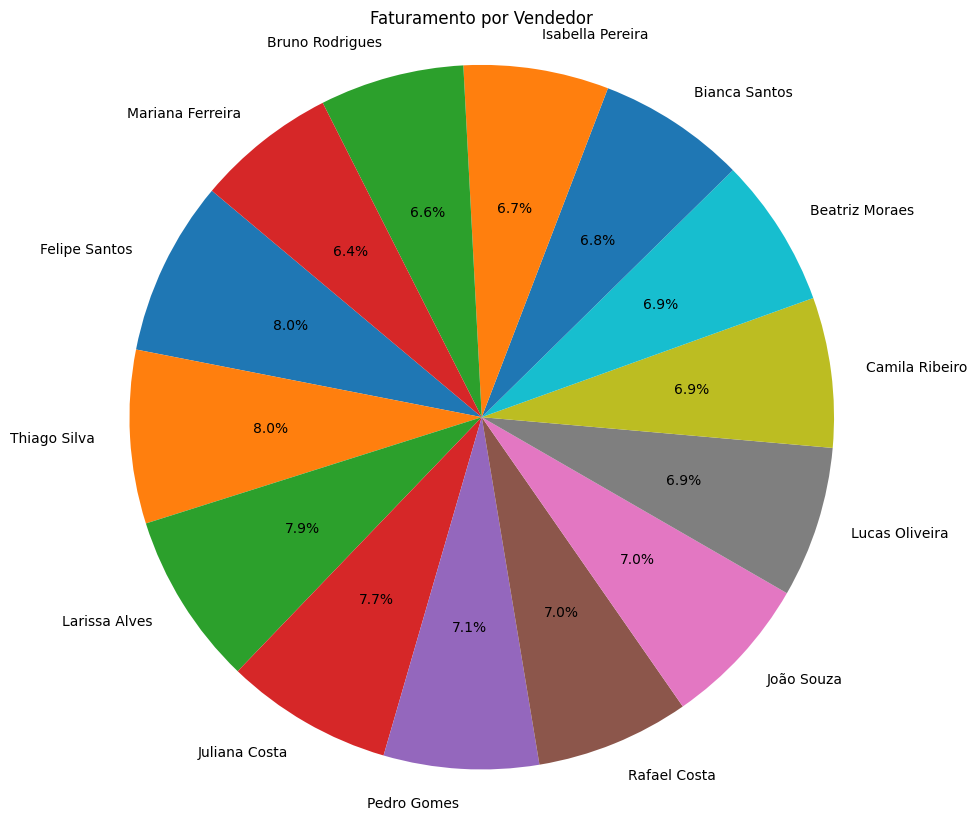

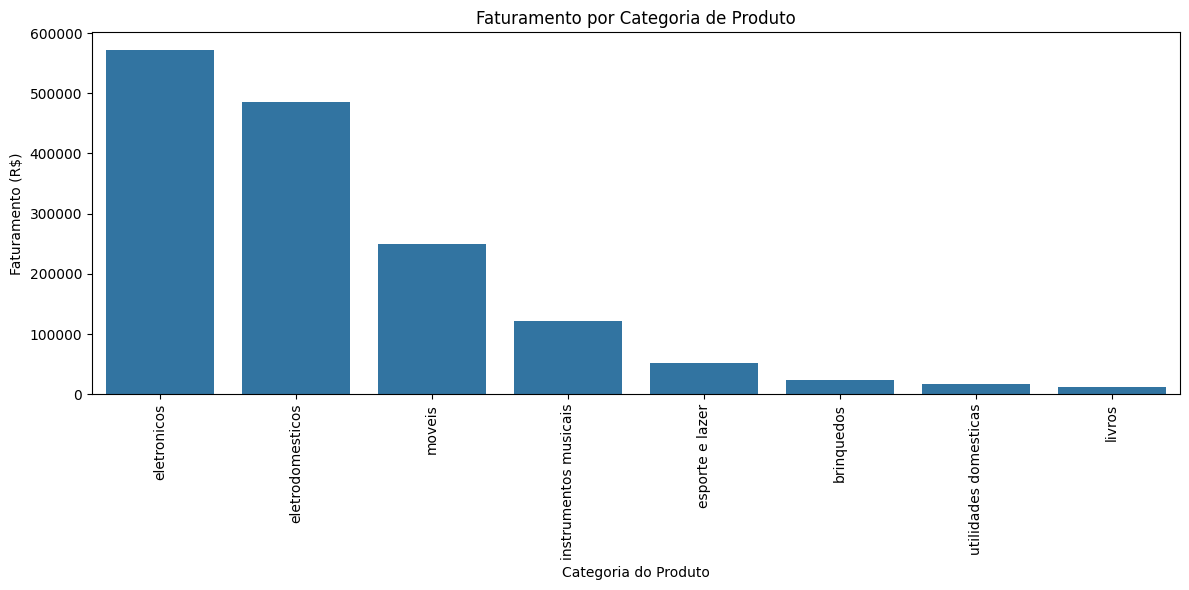

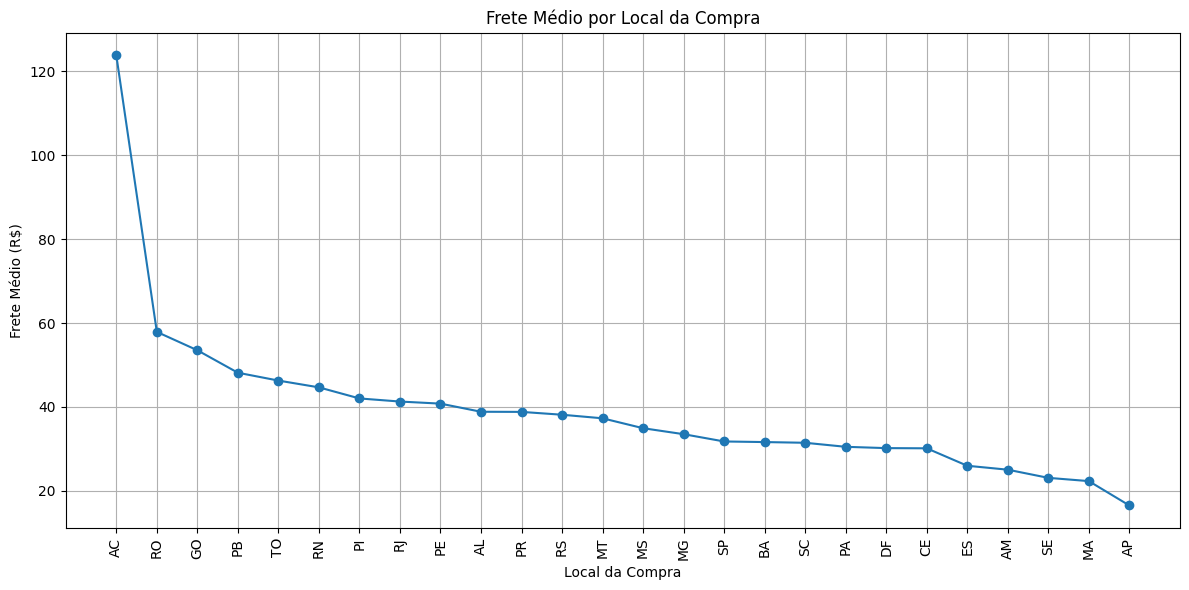

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Faturamento por Vendedor (Pie Chart)
plt.figure(figsize=(10, 10))
plt.pie(faturamento_por_vendedor, labels=faturamento_por_vendedor.index, autopct='%1.1f%%', startangle=140)
plt.title('Faturamento por Vendedor')
plt.axis('equal')
plt.show()

# Plot Vendas por Categoria (Bar Plot)
plt.figure(figsize=(12, 6))
sns.barplot(x=vendas_por_categoria.index, y=vendas_por_categoria['faturamento'])
plt.title('Faturamento por Categoria de Produto')
plt.xlabel('Categoria do Produto')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot Frete Médio por Local (Line Plot)
plt.figure(figsize=(12, 6))
plt.plot(frete_medio_por_loja.index, frete_medio_por_loja.values, marker='o')
plt.title('Frete Médio por Local da Compra')
plt.xlabel('Local da Compra')
plt.ylabel('Frete Médio (R$)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

## Relatorio

O principal objetivo da análise foi descobrir qual das quatro lojas da Alura Store está indo pior e, por isso, deveria ser vendida ou fechada antes de uma nova expansão. Para isso, foram usados dados reais sobre faturamento, volume de vendas, avaliações dos clientes e custo médio de frete, além de gráficos que ajudaram a comparar o desempenho de cada loja.

Os dados revelaram que a loja de Pedro Gomes teve o menor faturamento, com apenas uma venda de baixo valor, o que a coloca como a de pior desempenho financeiro. Mesmo tendo boas avaliações e o frete mais barato, isso não foi suficiente para aumentar as vendas ou impulsionar o crescimento. Por outro lado, outras lojas se destacaram: João Souza teve o maior faturamento, graças a produtos de maior valor, enquanto Larissa Alves se destacou com as melhores avaliações dos clientes, mostrando grande potencial para fidelização. A loja de Beatriz Moraes, embora tenha vendido pouco, teve o pior índice de satisfação, o que traz um outro tipo de risco, relacionado à sua reputação.

Analisando os indicadores e os gráficos (faturamento por loja, número de vendas por categoria e custo médio de frete), a loja de Pedro Gomes se destacou de forma negativa, sempre apresentando resultados abaixo das demais, sem pontos fortes que justificassem sua continuidade. Assim, a recomendação é que essa loja seja vendida ou reformulada, já que ela é a que mais prejudica o desempenho geral do negócio. Essa decisão é apoiada pelos dados financeiros e pela baixa relevância comercial da unidade, tornando o investimento nela menos estratégico em comparação com as outras lojas.